# I am no longer using this notebook. Most of the code I actually use is in to_csv.py and utilities.py - Reece

# Plot all points of a file on a map to guage the extent of the area covered

In [ ]:
# Map Data
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

from itertools import product

FILE_NUM = 0

records = defaultdict(lambda: dict())

points = [Point(xy) for xy in zip(vars["longitude"], vars["latitude"])]
gdf = GeoDataFrame(None, geometry=points)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=1);

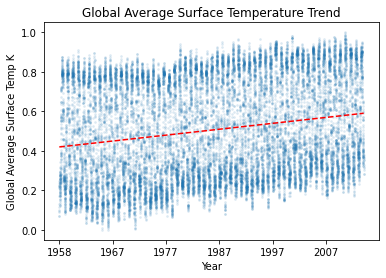

In [21]:
# Plot temps over time
import globus_setup
from utilities import *
import importlib
importlib.reload(globus_setup)
from globus_setup import *

def plot_temps():
    with open(CSV_NAME, "r") as f:
        csv_reader = csv.DictReader(f)
        rows = sorted(csv_reader, key=lambda r: float(r["day"]))
        y = np.array([float(r["tas"]) for r in rows])
        x = np.array([int(r["day"]) for r in rows])
    
    plt.scatter(x, y, s=3, alpha=.1)
    xyears = np.array([int(get_date_from_offset(int(r), output_format="%Y")) for r in x])
    ticks = np.arange(0, len(x), step=365*10)
    plt.xticks(x[ticks], xyears[ticks])

    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x,p(x),"r--")
    
    plt.title("Global Average Surface Temperature Trend")
    plt.ylabel("Global Average Surface Temp K")
    plt.xlabel("Year")
    plt.show()

plot_temps()